## This Script Contains the following points:

#### 1. Importing Libraries and Data
#### 2. Preparing Data for Random Forests
#### 3. Creating Random Forests
#### 4. Identifying Feature Importances
#### 5. Modeling the 3 Most Influential Weather Stations & Identifying the Feature Importances¶

# 1. Importing Libraries and Data

In [180]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from numpy import argmax

In [181]:
# Set option to ensure charts are displayed inline in the notebook

%matplotlib inline

In [182]:
# Set option to display max number of columns

pd.set_option('display.max_columns', None)

In [183]:
# Define path for importing the data

path = r'/Users/kimkmiz/Desktop/ClimateWins'

In [184]:
# Importing clean data

df_1 = pd.read_csv(os.path.join(path, '01 Data', 'Prepared Data', 'cleaned_with_date.csv'))

In [229]:
# Importing unscaled pleasant weather data
df_pleasant = pd.read_csv(os.path.join(path, '01 Data', 'Original Data', 'Pleasant_Weather.csv'))

In [186]:
# Check data

df_1.head(1)

DATE  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  19600101                  7            0.85           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
0              6.5             0.8            10.9                     1   

   BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
0               0.81             1.0195                       0.88   

   BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
0                     0.0                7.0                 3.7   

   BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
0               -0.9                7.9                     4   

   BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
0               0.67              1.017                       0.44   

   BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
0                    0.01                2.3                 2.4   

   BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  DEBILT_humidity  \
0               -0.4                5.1                   7             0.85   

   DEBILT_pressure  DEBILT_global_radiation  DEBILT_precipitation  \
0           1.0032                     0.07                  0.25   

   DEBILT_sunshine  DEBILT_temp_mean  DEBILT_temp_min  DEBILT_temp_max  \
0              0.0               9.3              7.4             11.0   

   DUSSELDORF_cloud_cover  DUSSELDORF_humidity  DUSSELDORF_pressure  \
0                       8                 0.83               1.0161   

   DUSSELDORF_global_radiation  DUSSELDORF_precipitation  DUSSELDORF_sunshine  \
0                         0.12                      0.08                  0.0   

   DUSSELDORF_temp_mean  DUSSELDORF_temp_min  DUSSELDORF_temp_max  \
0                  10.0                  7.0                 11.5   

   HEATHROW_cloud_cover  HEATHROW_humidity  HEATHROW_pressure  \
0                     7               0.91              1.001   

   HEATHROW_global_radiation  HEATHROW_precipitation  HEATHROW_sunshine  \
0                       0.13                    0.22                0.0   

   HEATHROW_temp_mean  HEATHROW_temp_min  HEATHROW_temp_max  \
0                10.6                9.4                8.3   

   KASSEL_cloud_cover  KASSEL_humidity  KASSEL_pressure  \
0                   8             0.82           1.0094   

   KASSEL_global_radiation  KASSEL_precipitation  KASSEL_sunshine  \
0                     0.28                  0.48              1.6   

   KASSEL_temp_mean  KASSEL_temp_min  KASSEL_temp_max  LJUBLJANA_cloud_cover  \
0               7.9              3.9              9.4                      8   

   LJUBLJANA_humidity  LJUBLJANA_pressure  LJUBLJANA_global_radiation  \
0                 1.0              1.0173                         0.2   

   LJUBLJANA_precipitation  LJUBLJANA_sunshine  LJUBLJANA_temp_mean  \
0                      0.0                 0.0                 -0.6   

   LJUBLJANA_temp_min  LJUBLJANA_temp_max  MAASTRICHT_cloud_cover  \
0                -1.9                 0.5                       7   

   MAASTRICHT_humidity  MAASTRICHT_pressure  MAASTRICHT_global_radiation  \
0                 0.83               1.0063                         0.22   

   MAASTRICHT_precipitation  MAASTRICHT_sunshine  MAASTRICHT_temp_mean  \
0                      0.32                  1.0                   9.5   

   MAASTRICHT_temp_min  MAASTRICHT_temp_max  MADRID_cloud_cover  \
0                  8.5                 11.1                   6   

   MADRID_humidity  MADRID_pressure  MADRID_global_radiation  \
0             0.92            1.026                     0.53   

   MADRID_precipitation  MADRID_sunshine  MADRID_temp_mean  MADRID_temp_min  \
0                   0.0              1.4               7.6              4.4   

   MADRID_temp_max  MUNCH

In [231]:
df_pleasant.head(1)

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   

   VALENTIA_pleasant_weather  
0                          0

In [188]:
# Check shape

df_1.shape

(22950, 136)

In [233]:
# Check shape

df_pleasant.shape

(22950, 16)

# 2. Preparing Data for Random Forests

**2010s Weather Data**

In [192]:
# Filter weather dataset to 2010s
df_2010s = df_1[df_1['DATE'].astype(str).str.startswith('201')] 
df_2010s.head(1)

DATE  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
18263  20100101                  8            0.93          0.9965   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
18263                    0.18                 0.56             0.0   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
18263              2.9            -0.2             4.8                     6   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
18263               0.85             0.9912                       0.64   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
18263                    2.63                3.2                 9.9   

       BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
18263                8.4               13.4                     6   

       BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
18263               0.67              1.017                       0.31   

       BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
18263                     0.0                0.7                 5.0   

       BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  \
18263                3.6                7.8                   4   

       DEBILT_humidity  DEBILT_pressure  DEBILT_global_radiation  \
18263             0.78           1.0026                     0.37   

       DEBILT_precipitation  DEBILT_sunshine  DEBILT_temp_mean  \
18263                   0.0              4.2              -1.6   

       DEBILT_temp_min  DEBILT_temp_max  DUSSELDORF_cloud_cover  \
18263             -6.3              0.7                       8   

       DUSSELDORF_humidity  DUSSELDORF_pressure  DUSSELDORF_global_radiation  \
18263                 0.89               0.9997                         0.12   

       DUSSELDORF_precipitation  DUSSELDORF_sunshine  DUSSELDORF_temp_mean  \
18263                      0.02                  0.0                  -1.1   

       DUSSELDORF_temp_min  DUSSELDORF_temp_max  HEATHROW_cloud_cover  \
18263                 -2.8                 -0.6                     2   

       HEATHROW_humidity  HEATHROW_pressure  HEATHROW_global_radiation  \
18263               0.77             1.0056                       0.49   

       HEATHROW_precipitation  HEATHROW_sunshine  HEATHROW_temp_mean  \
18263                     0.0                6.4                 1.6   

       HEATHROW_temp_min  HEATHROW_temp_max  KASSEL_cloud_cover  \
18263               -0.5                5.0                   8   

       KASSEL_humidity  KASSEL_pressure  KASSEL_global_radiation  \
18263             0.93           0.9981                     0.12   

       KASSEL_precipitation  KASSEL_sunshine  KASSEL_temp_mean  \
18263                   0.2              0.0              -2.6   

       KASSEL_temp_min  KASSEL_temp_max  LJUBLJANA_cloud_cover  \
18263             -3.0             -1.8                      8   

       LJUBLJANA_humidity  LJUBLJANA_pressure  LJUBLJANA_global_radiation  \
18263                0.97              0.9926                        0.12   

       LJUBLJANA_precipitation  LJUBLJANA_sunshine  LJUBLJANA_temp_mean  \
18263                     0.46                 0.0                  6.9   

       LJUBLJANA_temp_min  LJUBLJANA_temp_max  MAASTRICHT_cloud_cover  \
18263                 5.5                 7.7                       7   

       MAASTRICHT_humidity  MAASTRICHT_pressure  MAASTRICHT_global_radiation  \
18263                 0.91               1.0008                         0.12   

       MAASTRICHT_precipitation  MAASTRICHT_sunshine  MAASTRICHT_temp_mean  \
18263                      0.01                  0.0                  -2.0   

       MAASTRICHT_temp_min  MAASTRICHT_temp_max  MADRID_cloud_cover  \
18263                 -6.1                 -1.1                   5   

       MADRID_humidity  MADRID_pressure  MADRID_global_radiation  \
18263             0.82

In [193]:
# Check shape
df_2010s.shape

(3652, 136)

In [235]:
# Filter pleasant dataset to 2010s
pleasant_2010s = df_pleasant[df_pleasant['DATE'].astype(str).str.startswith('201')] 
pleasant_2010s.head(1)

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263  20100101                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18263                          0                      0   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
18263                           0                           0   

       VALENTIA_pleasant_weather  
18263                          0

In [237]:
# Check shape
pleasant_2010s.shape

(3652, 16)

In [323]:
# Drop 'DATE' and 'MONTH' columns from 2010s weather dataset
df_2010s_2 = df_2010s.drop(columns=['DATE'])

# Check shape
df_2010s_2.shape

(3652, 135)

In [325]:
# Drop 'DATE' column from 2010s pleasant dataset
pleasant_2010s_2 = pleasant_2010s.drop(columns=['DATE'])

# Check shape
pleasant_2010s_2.shape

(3652, 15)

In [326]:
# Create matrices -- combine 15 columns in pleasant weather data into single column
y_1 = pleasant_2010s_2.max(axis=1)
print("Shape of y_1_combined:", y_1.shape)

Shape of y_1_combined: (3652,)


In [327]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_1_combined:", y_1.unique())

Unique values in y_1_combined: [0 1]


In [328]:
# Ensure y has the correct shape
y_1 = y_1.to_numpy().reshape(-1)

In [329]:
# Check shape
y_1.shape

(3652,)

In [330]:
# Create X matrix
X_1 = df_2010s_2.to_numpy()

In [331]:
# Check shapes
print(X_1.shape)
print(y_1.shape)

(3652, 135)
(3652,)


In [332]:
# Split data into training and testing sets

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, random_state=127)

In [333]:
# Check shapes
print(X_train_1.shape, y_train_1.shape)
print(X_test_1.shape, y_test_1.shape)

(2739, 135) (2739,)
(913, 135) (913,)


**2000s Weather Data**

In [335]:
# Filter weather dataset to 2000s
df_2000s = df_1[df_1['DATE'].astype(str).str.startswith('200')] 
df_2000s.head(1)

DATE  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
14610  20000101                  8            0.89          1.0286   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
14610                     0.2                 0.03             0.0   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
14610              2.9             1.6             3.9                     7   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
14610               0.88             1.0275                       0.24   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
14610                     0.0                0.0                -2.5   

       BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
14610               -3.2               -0.4                     3   

       BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
14610               0.92             1.0268                       0.52   

       BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
14610                     0.0                3.7                -4.9   

       BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  \
14610               -8.4               -0.7                   7   

       DEBILT_humidity  DEBILT_pressure  DEBILT_global_radiation  \
14610             0.97            1.024                     0.14   

       DEBILT_precipitation  DEBILT_sunshine  DEBILT_temp_mean  \
14610                   0.1              0.0               6.1   

       DEBILT_temp_min  DEBILT_temp_max  DUSSELDORF_cloud_cover  \
14610              3.5              8.1                       8   

       DUSSELDORF_humidity  DUSSELDORF_pressure  DUSSELDORF_global_radiation  \
14610                 0.92                1.024                         0.12   

       DUSSELDORF_precipitation  DUSSELDORF_sunshine  DUSSELDORF_temp_mean  \
14610                      0.22                  0.0                   4.2   

       DUSSELDORF_temp_min  DUSSELDORF_temp_max  HEATHROW_cloud_cover  \
14610                  2.5                  6.9                     7   

       HEATHROW_humidity  HEATHROW_pressure  HEATHROW_global_radiation  \
14610               0.94             1.0245                       0.18   

       HEATHROW_precipitation  HEATHROW_sunshine  HEATHROW_temp_mean  \
14610                     0.0                0.4                 7.0   

       HEATHROW_temp_min  HEATHROW_temp_max  KASSEL_cloud_cover  \
14610                4.9               10.8                   8   

       KASSEL_humidity  KASSEL_pressure  KASSEL_global_radiation  \
14610             0.93           1.0237                     0.12   

       KASSEL_precipitation  KASSEL_sunshine  KASSEL_temp_mean  \
14610                  0.13              0.0               3.5   

       KASSEL_temp_min  KASSEL_temp_max  LJUBLJANA_cloud_cover  \
14610              1.5              5.0                      6   

       LJUBLJANA_humidity  LJUBLJANA_pressure  LJUBLJANA_global_radiation  \
14610                0.83              1.0294                        0.57   

       LJUBLJANA_precipitation  LJUBLJANA_sunshine  LJUBLJANA_temp_mean  \
14610                      0.0                 5.2                 -4.8   

       LJUBLJANA_temp_min  LJUBLJANA_temp_max  MAASTRICHT_cloud_cover  \
14610                -9.1                -1.3                       8   

       MAASTRICHT_humidity  MAASTRICHT_pressure  MAASTRICHT_global_radiation  \
14610                 0.98               1.0251                         0.12   

       MAASTRICHT_precipitation  MAASTRICHT_sunshine  MAASTRICHT_temp_mean  \
14610                      0.17                  0.0                   5.6   

       MAASTRICHT_temp_min  MAASTRICHT_temp_max  MADRID_cloud_cover  \
14610                  4.1                  6.9                   1   

       MADRID_humidity  MADRID_pressure  MADRID_global_radiation  \
14610              0.8

In [336]:
# Check shape
df_2000s.shape

(3653, 136)

In [337]:
# Filter pleasant dataset to 2000s
pleasant_2000s = df_pleasant[df_pleasant['DATE'].astype(str).str.startswith('200')] 
pleasant_2000s.head(1)

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
14610  20000101                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
14610                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
14610                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
14610                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
14610                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
14610                          0                      0   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
14610                           0                           0   

       VALENTIA_pleasant_weather  
14610                          0

In [338]:
# Check shape
pleasant_2000s.shape

(3653, 16)

In [389]:
# Drop 'DATE' and 'MONTH' columns from 2000s weather dataset
df_2000s_2 = df_2000s.drop(columns=['DATE'])

# Check shape
df_2000s_2.shape

(3653, 135)

In [391]:
# Drop 'DATE' column from 2000s pleasant dataset
pleasant_2000s_2 = pleasant_2000s.drop(columns=['DATE'])

# Check shape
pleasant_2000s_2.shape

(3653, 15)

In [393]:
# Create matrices -- combine 15 columns in pleasant weather data into single column
y_2 = pleasant_2000s_2.max(axis=1)
print("Shape of y_2_combined:", y_2.shape)

Shape of y_2_combined: (3653,)


In [394]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_2_combined:", y_2.unique())

Unique values in y_2_combined: [0 1]


In [395]:
# Ensure y has the correct shape
y_2 = y_2.to_numpy().reshape(-1)

In [396]:
# Check shape
y_2.shape

(3653,)

In [397]:
# Create X matrix
X_2 = df_2000s_2.to_numpy()

In [398]:
# Check shapes
print(X_2.shape)
print(y_2.shape)

(3653, 135)
(3653,)


In [399]:
# Split data into training and testing sets

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=127)

In [400]:
# Check shapes
print(X_train_2.shape, y_train_2.shape)
print(X_test_2.shape, y_test_2.shape)

(2739, 135) (2739,)
(914, 135) (914,)


# 3. Creating Random Forests

**Random Forest 1 (2010s Data)**

In [403]:
# Creating a Random Forest classifier
clf_1 = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_1.fit(X_train_1, y_train_1)

RandomForestClassifier(max_depth=10)

In [404]:
# Perform the predictions on the test dataset
y_pred_1 = clf_1.predict(X_test_1)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_1, y_pred_1))

Model Accuracy:  0.976998904709748


In [405]:
# Check unique values in y
unique_classes = np.unique(y_1)
print(unique_classes)
print(len(unique_classes)) 

[0 1]
2


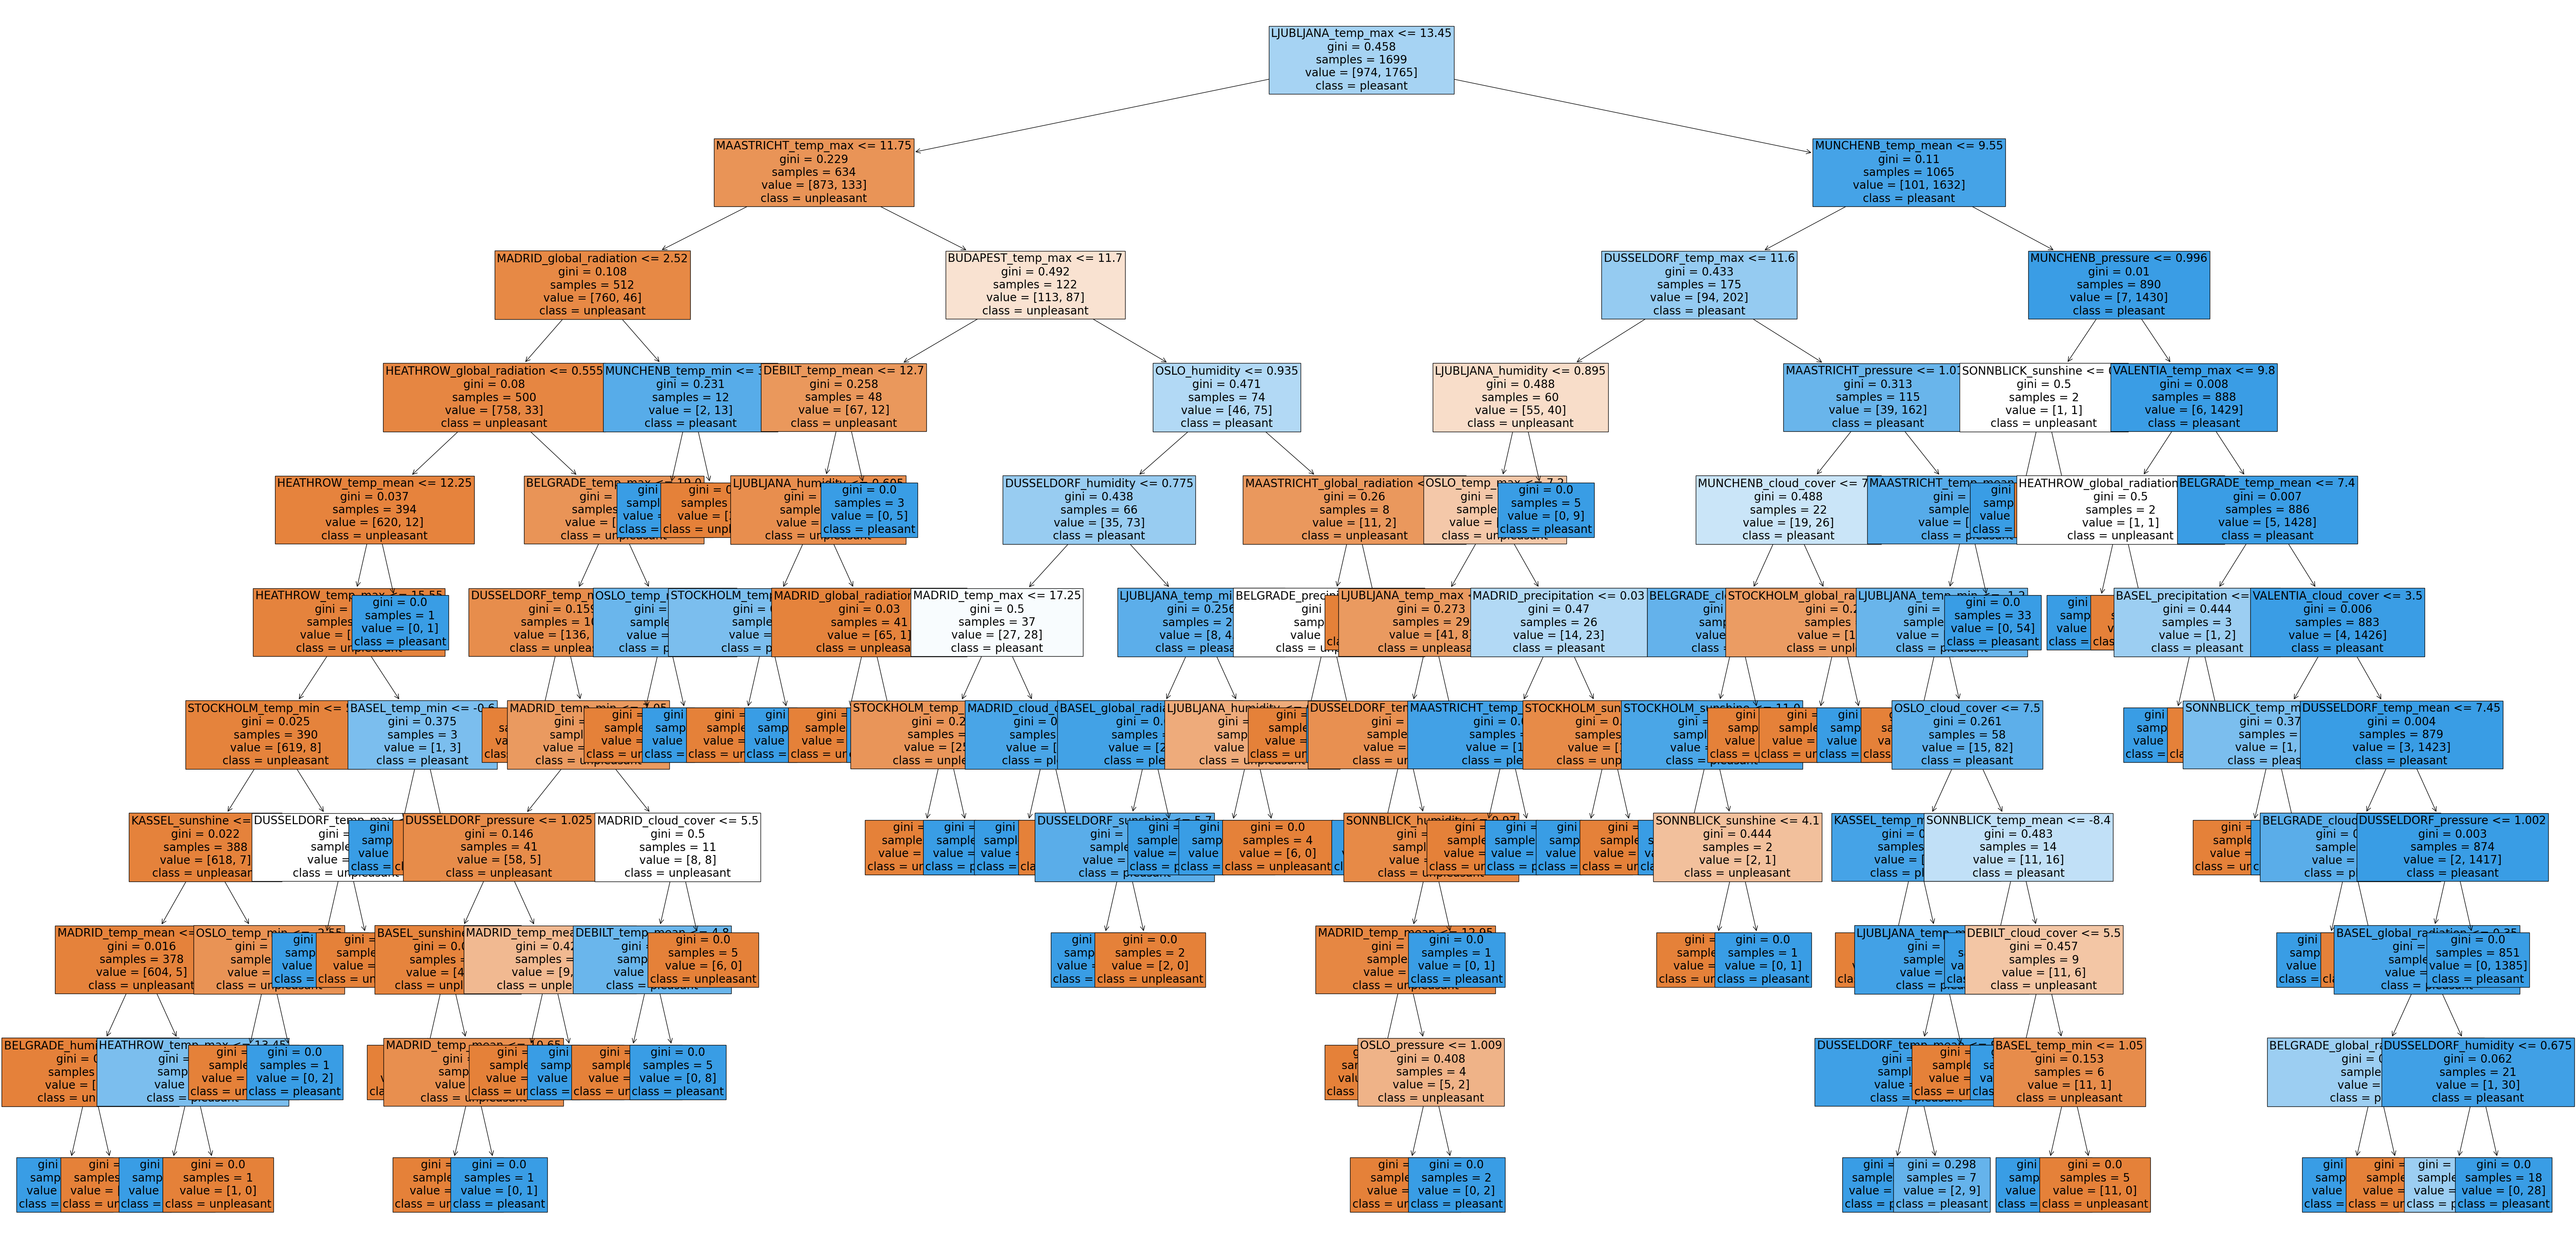

In [406]:
# Plot random forest (2010s)
rf_1 = plt.figure(figsize=(80,40))
plot_tree(clf_1.estimators_[5], fontsize = 20, feature_names=df_2010s_2.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [431]:
rf_1.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'random_forest_2010s.png'),bbox_inches='tight')

**Random Forest 2 (2000s Data)**

In [434]:
# Creating a Random Forest classifier
clf_2 = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_2.fit(X_train_2, y_train_2)

RandomForestClassifier(max_depth=10)

In [435]:
# Perform the predictions on the test dataset
y_pred_2 = clf_2.predict(X_test_2)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_2, y_pred_2))

Model Accuracy:  0.9606126914660832


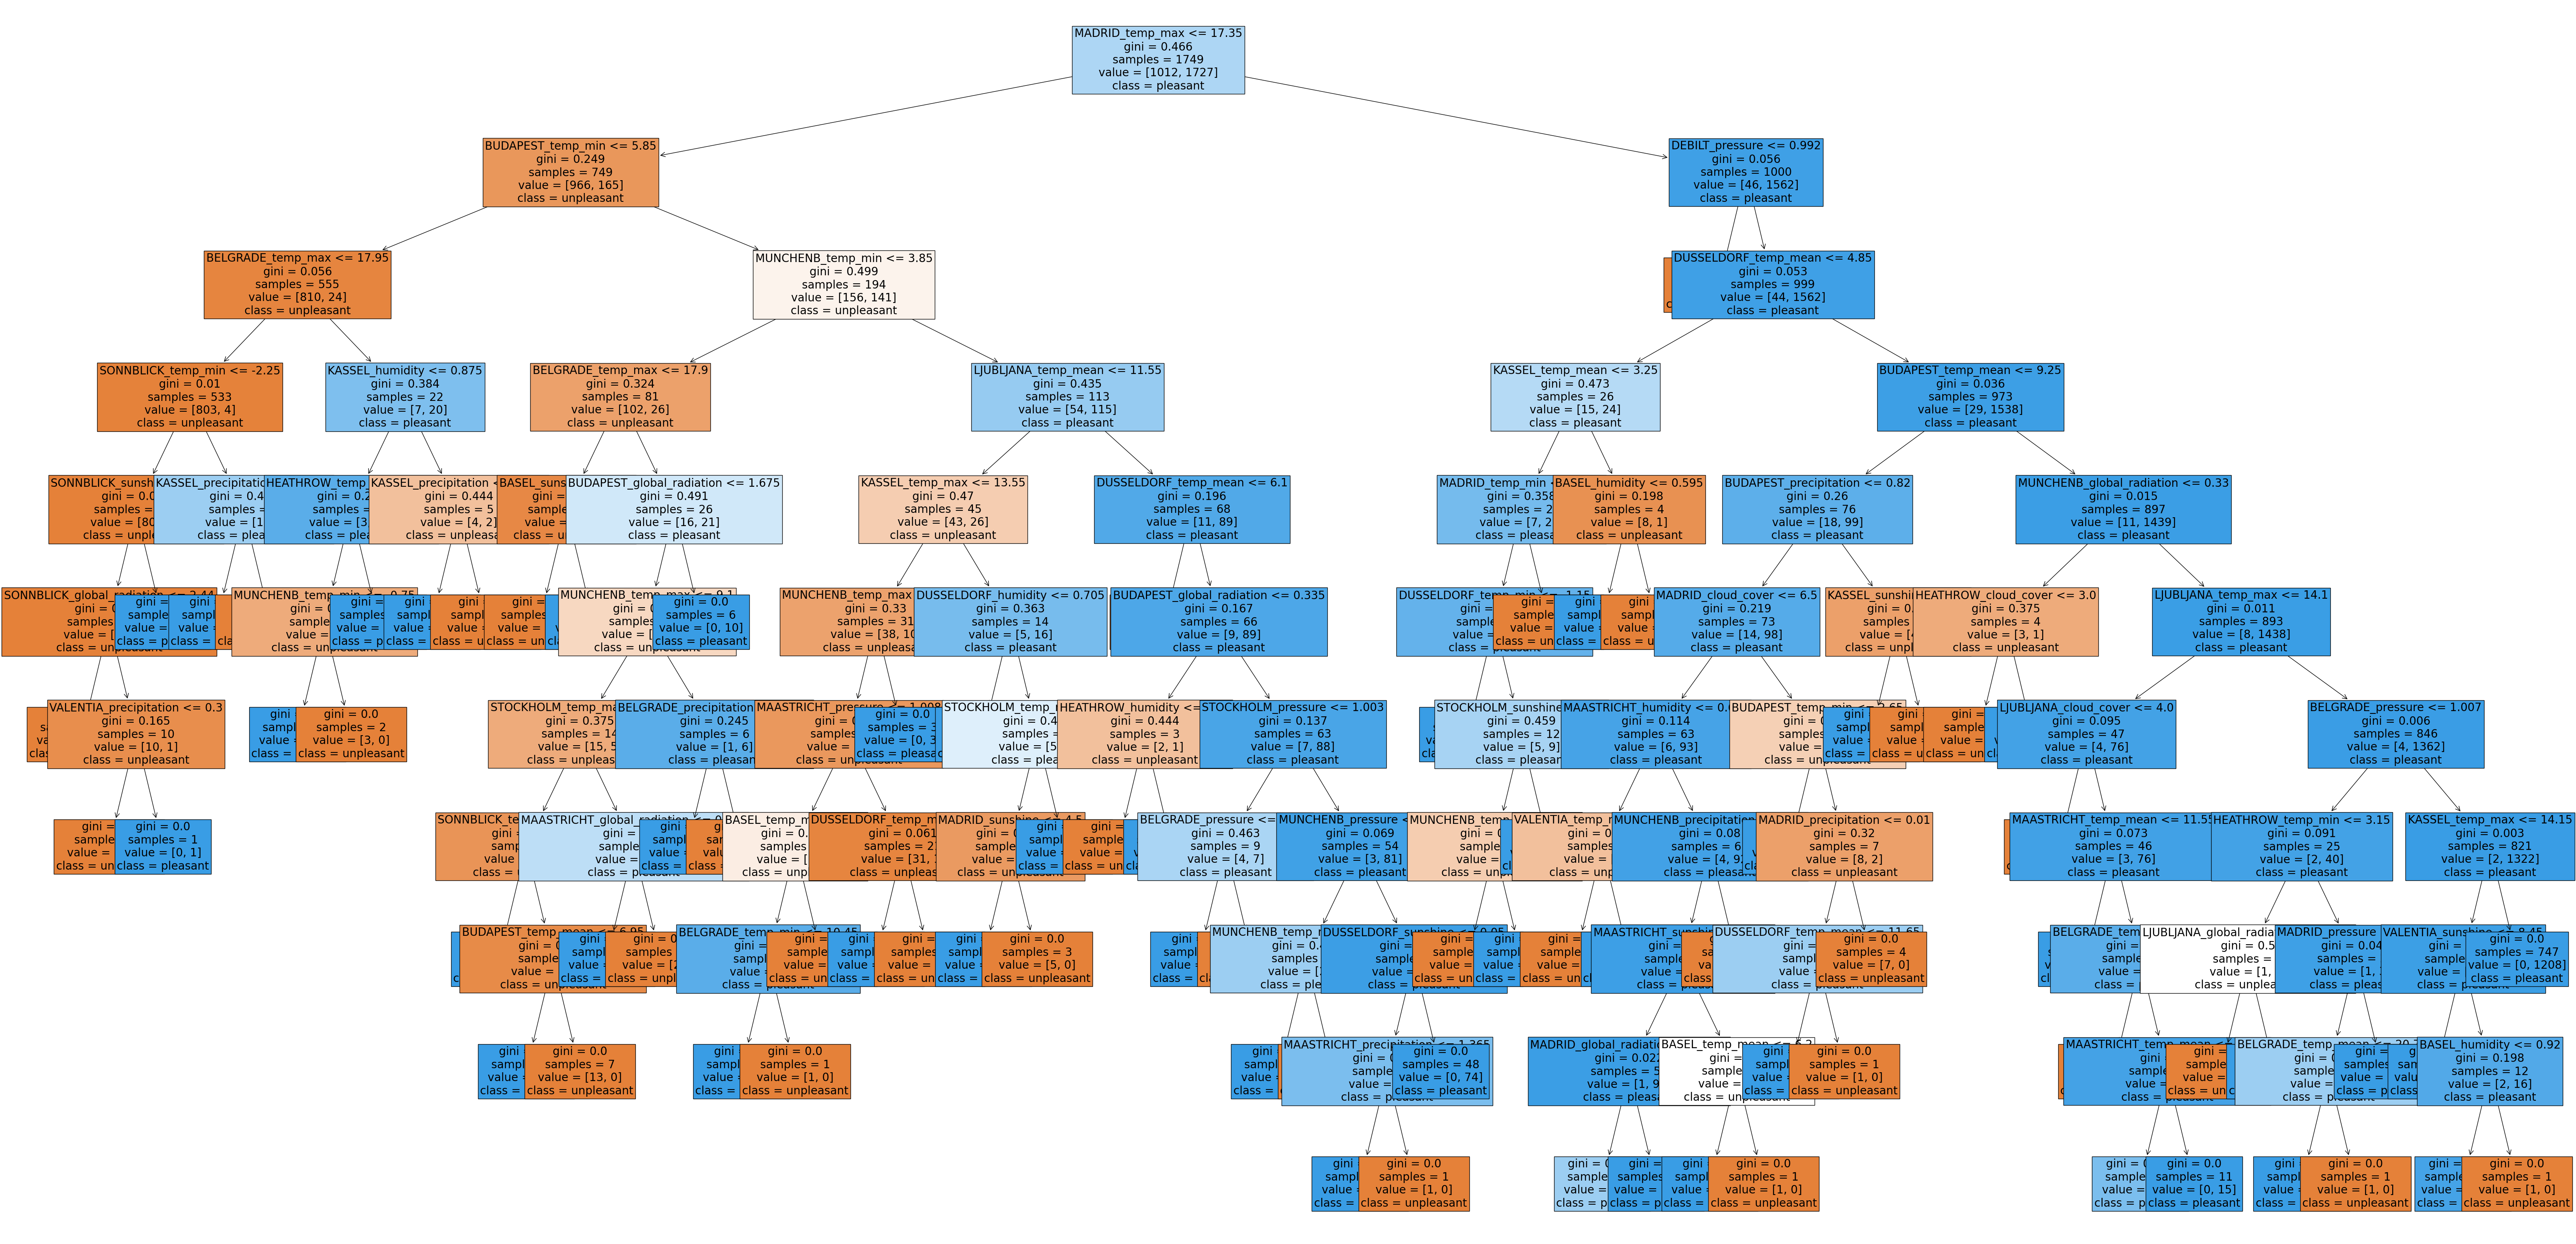

In [436]:
# Plot random forest (2010s)
rf_2 = plt.figure(figsize=(80,40))
plot_tree(clf_2.estimators_[5], fontsize = 20, feature_names=df_2000s_2.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [503]:
rf_2.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'random_forest_2000s.png'),bbox_inches='tight')

# 4. Identifying Feature Importances

**2010s Data**

In [507]:
# Retrieve feature importances from the trained model
feature_importances_1 = clf_1.feature_importances_
print("Feature Importances:", feature_importances_1)
print(feature_importances_1.shape)

Feature Importances: [5.37843953e-04 9.70514825e-04 1.17187349e-03 3.14739259e-03
 7.35614190e-04 6.69875126e-04 3.78861801e-02 1.84988192e-03
 3.17871459e-02 9.35680353e-04 2.71233425e-03 2.01385195e-03
 1.50893089e-03 2.19844289e-03 3.95185344e-03 1.24976212e-02
 9.13685469e-03 3.03939900e-02 2.16729867e-04 0.00000000e+00
 0.00000000e+00 8.33121690e-04 6.40312016e-04 1.27459826e-03
 5.43081356e-02 8.57740337e-03 4.92965449e-02 3.87630155e-04
 1.12485735e-03 6.93262960e-04 7.15235194e-03 7.61645454e-04
 8.00432727e-04 1.54087942e-02 1.01482300e-03 4.09014299e-02
 6.40541011e-04 1.00159509e-03 1.15153282e-03 1.55908492e-03
 7.00976970e-04 1.94481830e-03 3.30070473e-02 5.27624951e-03
 6.02429516e-02 8.40522640e-04 1.40385015e-03 1.07589258e-03
 3.84983314e-03 4.86702568e-04 9.63177728e-04 2.73272606e-02
 2.23941679e-03 1.14405906e-02 4.36206011e-04 5.62620901e-04
 3.32630246e-04 6.25085308e-04 3.08636169e-04 3.97569922e-04
 6.68969916e-04 7.53209889e-04 1.00692366e-03 5.44620012e-04
 2.

In [508]:
# Reshape the feature importances to (-1, 15, 9)
reshaped_importances_1 = feature_importances_1.reshape(-1, 15, 9)

# Check shape
print("Reshaped Importances Shape:", reshaped_importances_1.shape)

Reshaped Importances Shape: (1, 15, 9)


In [509]:
# Sum the values across the last dimension to get one observation for each weather station
collapsed_importances_1 = np.sum(reshaped_importances_1[0], axis=1)

# Check shape
print("Collapsed Importances Shape:", collapsed_importances_1.shape)
print("Collapsed Importances:", collapsed_importances_1)

Collapsed Importances Shape: (15,)
Collapsed Importances: [0.07875632 0.06534956 0.11514685 0.06824523 0.1055248  0.04962725
 0.00509185 0.11483936 0.03648148 0.17938946 0.05980686 0.05424421
 0.01348796 0.04980364 0.00420519]


In [510]:
# Create list for weather stations
weather_stations = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
                    'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
                    'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

In [511]:
# Create a dataframe to associate weather stations with their importances
collapsed_importances_df_1 = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances_1
})

In [512]:
# Sort by importance for chart readability
collapsed_importances_df_1 = collapsed_importances_df_1.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(collapsed_importances_df_1)

Collapsed Feature Importances:
   Weather Station  Importance
9           MADRID    0.179389
2         BUDAPEST    0.115147
7        LJUBLJANA    0.114839
4       DUSSELDORF    0.105525
0            BASEL    0.078756
3           DEBILT    0.068245
1         BELGRADE    0.065350
10        MUNCHENB    0.059807
11            OSLO    0.054244
13       STOCKHOLM    0.049804
5         HEATHROW    0.049627
8       MAASTRICHT    0.036481
12       SONNBLICK    0.013488
6           KASSEL    0.005092
14        VALENTIA    0.004205


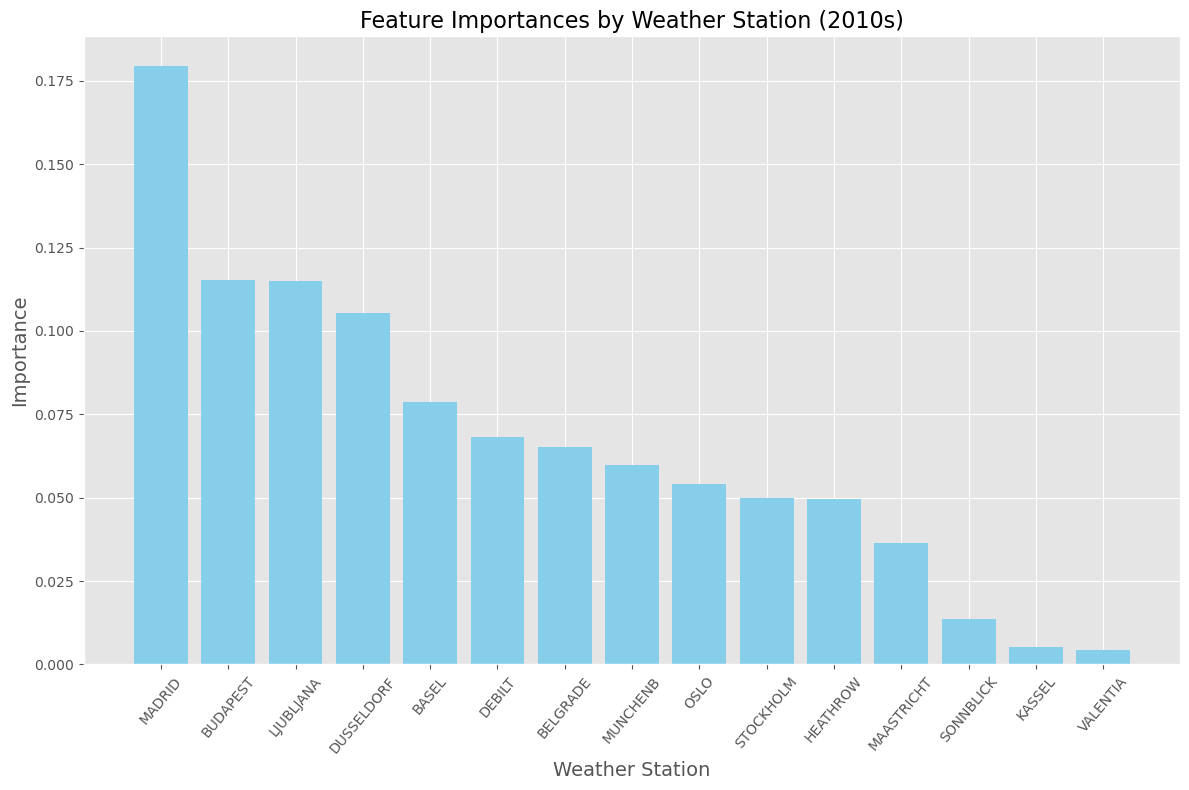

In [513]:
# Plot the importances

plt.style.use('ggplot')
plt_1 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances_df_1['Weather Station'], collapsed_importances_df_1['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (2010s)', fontsize=16)
plt.tight_layout()
plt.show()

In [533]:
plt_1.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'feature_importances_2010s.png'),bbox_inches='tight')

**2000s Data**

In [535]:
# Retrieve feature importances from the trained model
feature_importances_2 = clf_2.feature_importances_
print("Feature Importances:", feature_importances_2)

Feature Importances: [0.00029333 0.00128713 0.00171861 0.00245997 0.00086196 0.00093145
 0.02958407 0.00249969 0.01510013 0.00102015 0.00389871 0.00132146
 0.01713927 0.0024789  0.00302462 0.05274608 0.00999776 0.02212886
 0.00073026 0.00206805 0.00101489 0.00385756 0.00110957 0.00195231
 0.04336462 0.02927194 0.06337898 0.00055037 0.00083632 0.00119925
 0.00272202 0.00070196 0.00098215 0.00760475 0.00166664 0.03266302
 0.00055398 0.00094727 0.00156846 0.00173505 0.00054743 0.00084723
 0.00863554 0.00112853 0.02803482 0.00041546 0.00085589 0.00120811
 0.00373806 0.00043511 0.00098601 0.00253967 0.00201664 0.02723642
 0.00046643 0.00126787 0.00105716 0.00306988 0.00094882 0.00096434
 0.00974858 0.00208345 0.02071846 0.00056272 0.00190578 0.00098078
 0.00285421 0.00079539 0.00100685 0.01285597 0.00292962 0.05858736
 0.00059158 0.00152488 0.00122395 0.00256326 0.00056794 0.0006961
 0.002285   0.0016662  0.02780903 0.00105544 0.00280859 0.00221843
 0.00913184 0.00228745 0.00372714 0.053823

In [536]:
# Reshape the feature importances to (-1, 15, 9)
reshaped_importances_2 = feature_importances_2.reshape(-1, 15, 9)

# Check shape
print("Reshaped Importances Shape:", reshaped_importances_2.shape)

Reshaped Importances Shape: (1, 15, 9)


In [537]:
# Sum the values across the last dimension to get one observation for each weather station
collapsed_importances_2 = np.sum(reshaped_importances_2[0], axis=1)

# Check shape
print("Collapsed Importances Shape:", collapsed_importances_2.shape)
print("Collapsed Importances:", collapsed_importances_2)

Collapsed Importances Shape: (15,)
Collapsed Importances: [0.05473634 0.11375579 0.14674817 0.04892648 0.0439983  0.03943137
 0.04032499 0.08247868 0.03892794 0.2365242  0.06980044 0.02300723
 0.01175265 0.03314339 0.01644403]


In [538]:
# Create a dataframe to associate weather stations with their importances
collapsed_importances_df_2 = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances_2
})

In [539]:
# Sort by importance for chart readability
collapsed_importances_df_2 = collapsed_importances_df_2.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(collapsed_importances_df_2)

Collapsed Feature Importances:
   Weather Station  Importance
9           MADRID    0.236524
2         BUDAPEST    0.146748
1         BELGRADE    0.113756
7        LJUBLJANA    0.082479
10        MUNCHENB    0.069800
0            BASEL    0.054736
3           DEBILT    0.048926
4       DUSSELDORF    0.043998
6           KASSEL    0.040325
5         HEATHROW    0.039431
8       MAASTRICHT    0.038928
13       STOCKHOLM    0.033143
11            OSLO    0.023007
14        VALENTIA    0.016444
12       SONNBLICK    0.011753


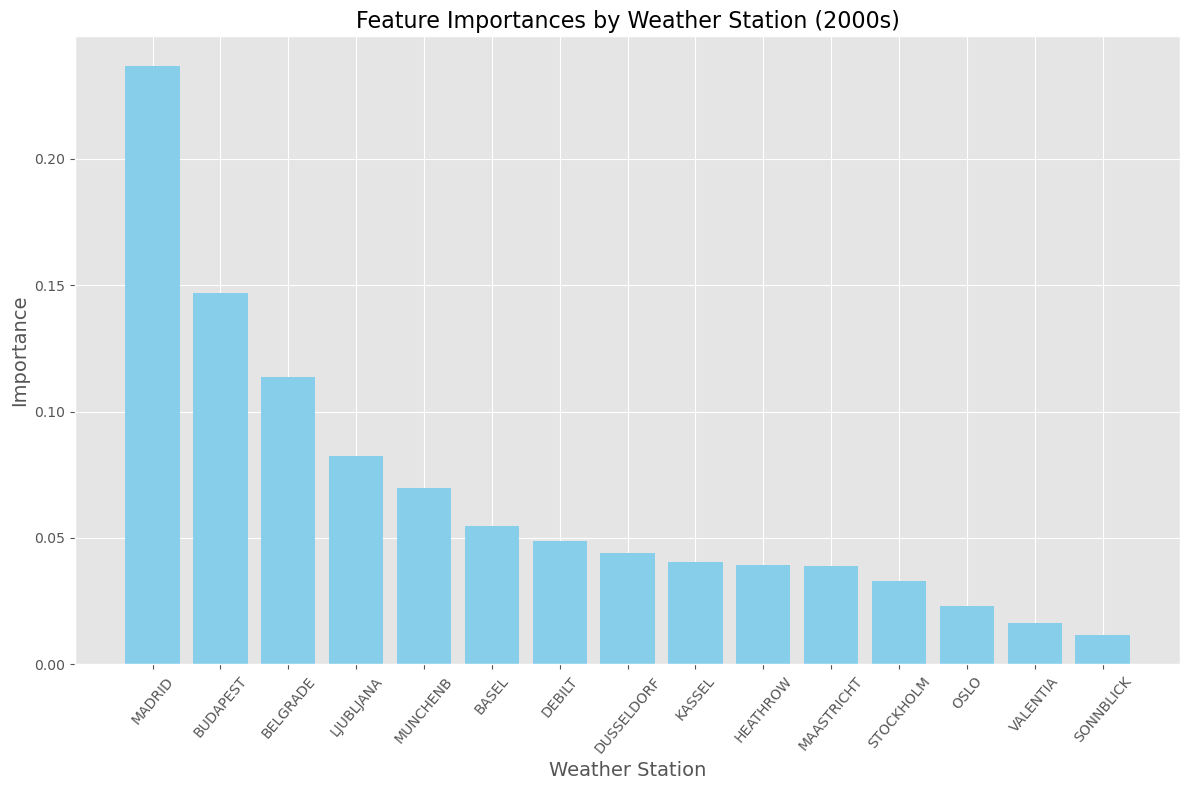

In [540]:
# Plot the importances

plt.style.use('ggplot')
plt_2 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances_df_2['Weather Station'], collapsed_importances_df_2['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (2000s)', fontsize=16)
plt.tight_layout()
plt.show()

In [562]:
plt_2.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'feature_importances_2000s.png'),bbox_inches='tight')

# 5. Modeling the 3 Most Influential Weather Stations & Identifying the Feature Importances

### **Madrid**

**Preprocessing the Data for Madrid**

In [567]:
# Filter weather dataset to only include Madrid
df_mad = df_1[df_1.columns[df_1.columns.astype(str).str.startswith('MADRID')]]

# Check output
df_mad.head(1)

MADRID_cloud_cover  MADRID_humidity  MADRID_pressure  \
0                   6             0.92            1.026   

   MADRID_global_radiation  MADRID_precipitation  MADRID_sunshine  \
0                     0.53                   0.0              1.4   

   MADRID_temp_mean  MADRID_temp_min  MADRID_temp_max  
0               7.6              4.4             10.8

In [568]:
# Filter pleasant dataset to only include Madrid
mad_pleasant = df_pleasant[df_pleasant.columns[df_pleasant.columns.astype(str).str.startswith('MADRID')]]

# Check output
mad_pleasant.head(1)

MADRID_pleasant_weather
0                        0

In [569]:
# Check shape
print(df_mad.shape)
print(mad_pleasant.shape)

(22950, 9)
(22950, 1)


In [570]:
# Create matrices
y_3 = mad_pleasant.max(axis=1)

# Check shape
print("Shape of y_3_combined:", y_3.shape)

Shape of y_3_combined: (22950,)


In [571]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_3_combined:", y_3.unique())

Unique values in y_3_combined: [0 1]


In [572]:
# Ensure y has the correct shape
y_3 = y_3.to_numpy().reshape(-1)

# Check shape
print(y_3.shape)

(22950,)


In [573]:
# Create X matrix
X_3 = df_mad.to_numpy()

# Check shapes of the matrices
print(X_3.shape)
print(y_3.shape)

(22950, 9)
(22950,)


In [574]:
# Split data into training and testing sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state=127)

# Check shapes
print(X_train_3.shape, y_train_3.shape)
print(X_test_3.shape, y_test_3.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


**Creating Random Forest for Madrid**

In [576]:
# Creating a Random Forest classifier
clf_3 = RandomForestClassifier(n_estimators = 100, max_depth=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_3.fit(X_train_3, y_train_3)

RandomForestClassifier(max_depth=3)

In [577]:
# Perform the predictions on the test dataset
y_pred_3 = clf_3.predict(X_test_3)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_3, y_pred_3))

Model Accuracy:  0.9966887417218543


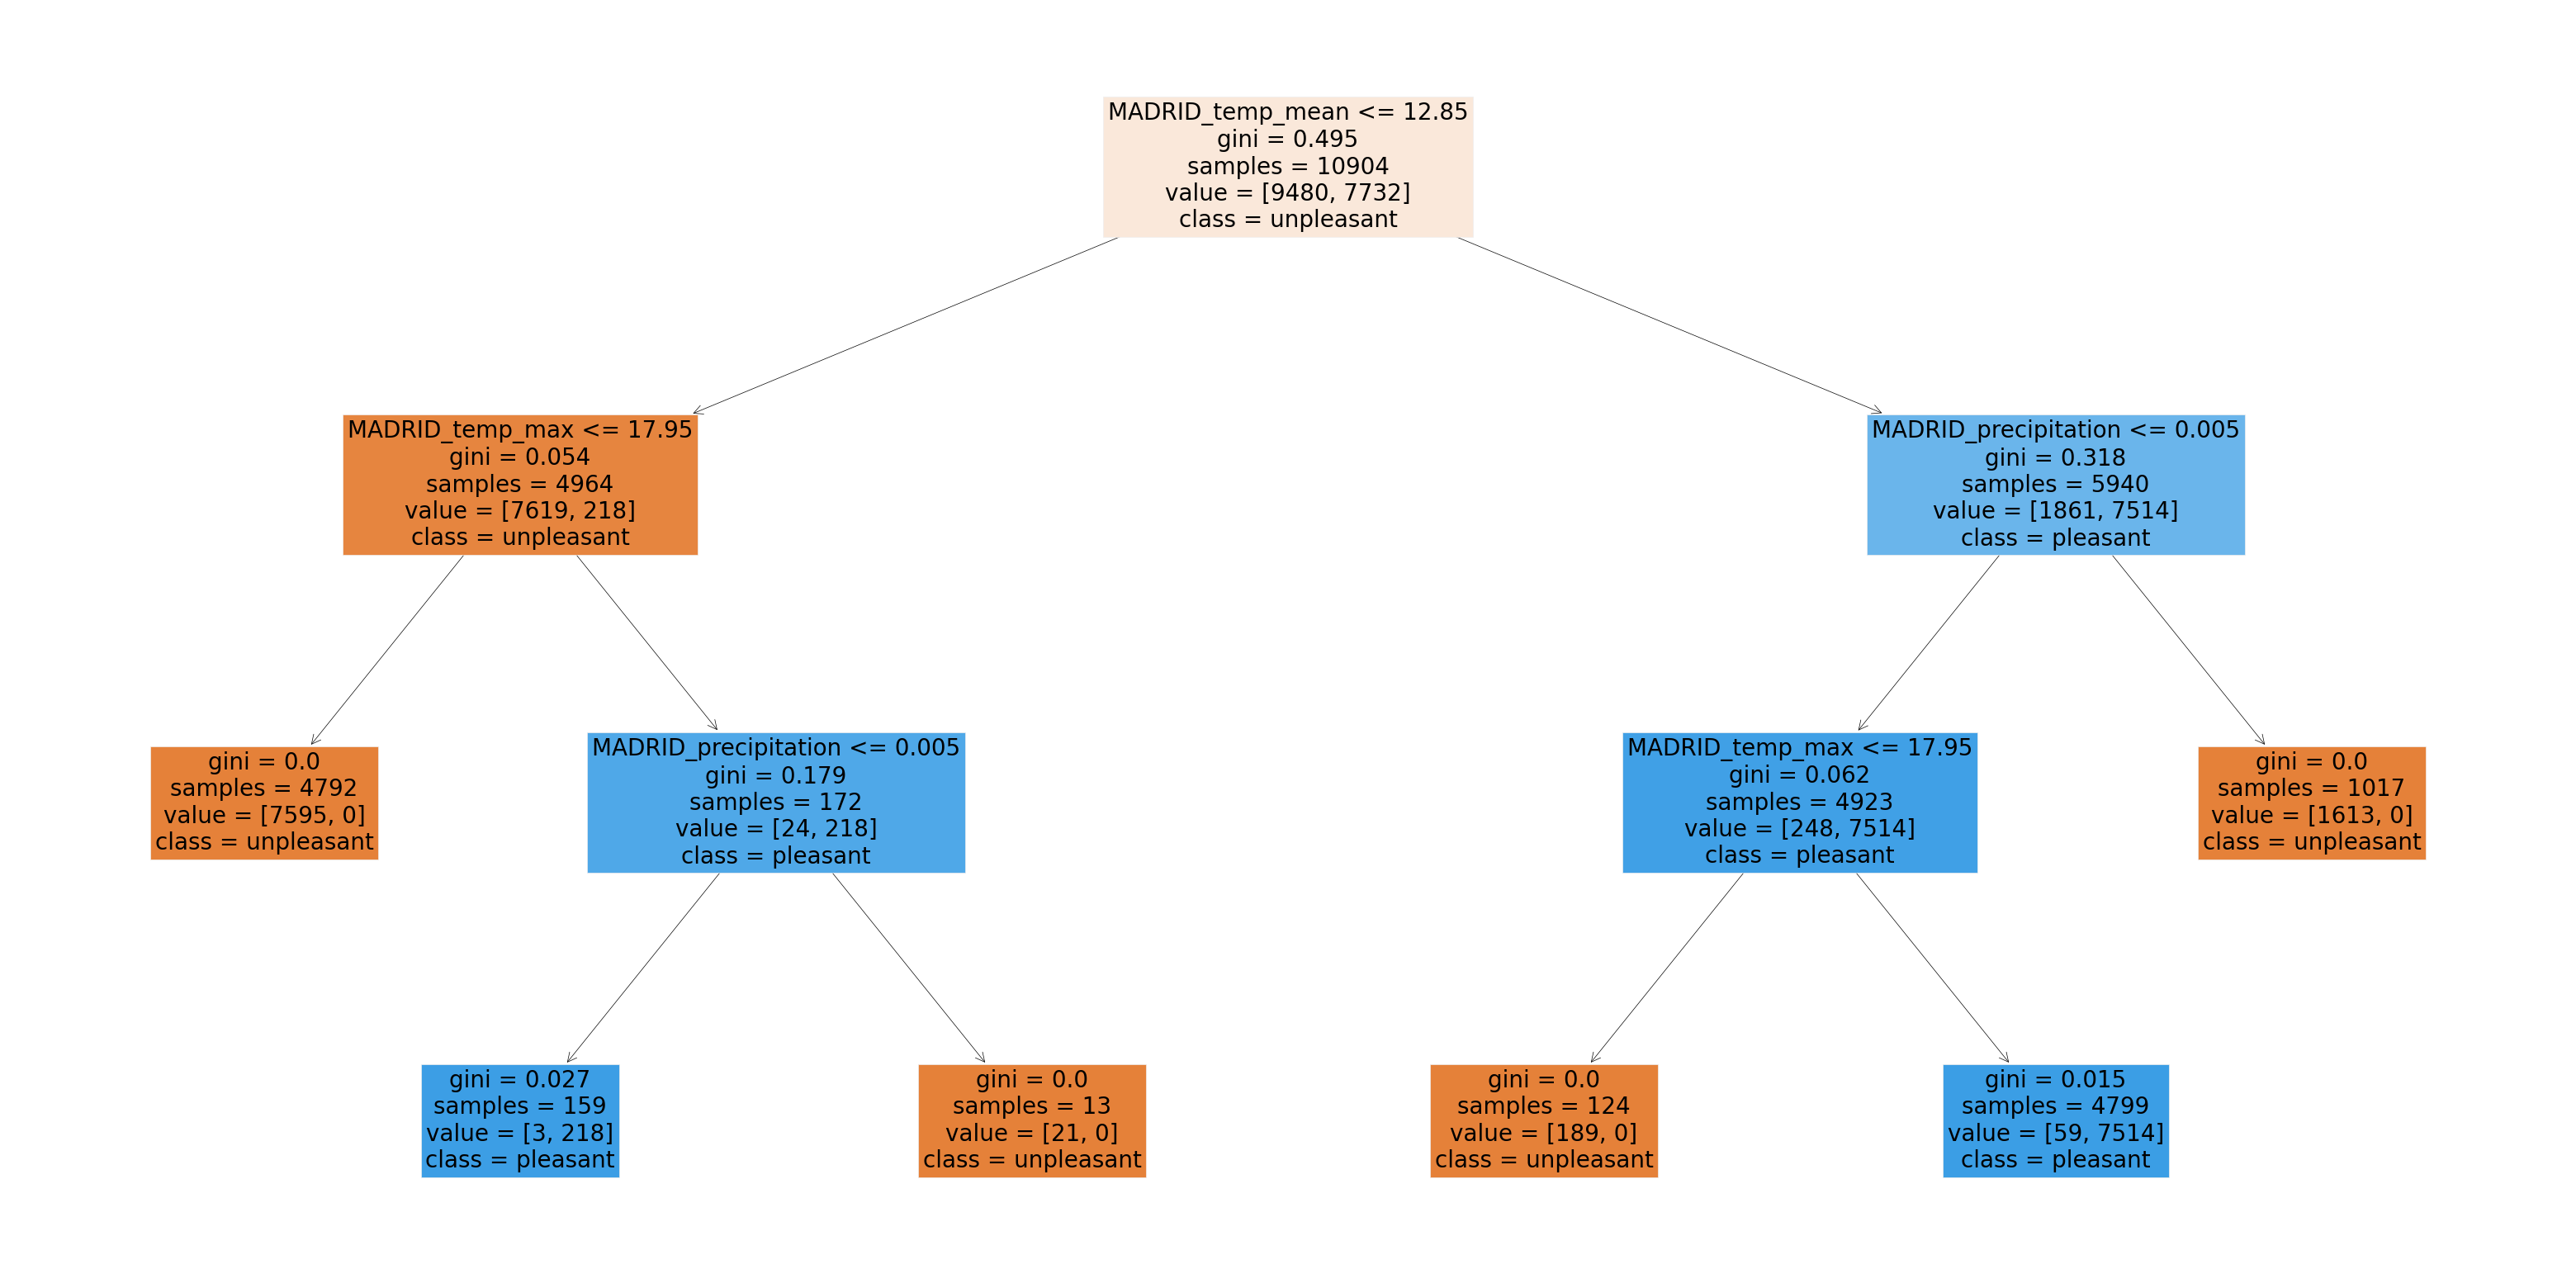

In [578]:
# Plot random forest (Madrid)
rf_3 = plt.figure(figsize=(40,20))
plot_tree(clf_3.estimators_[5], fontsize = 20, feature_names=df_mad.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [602]:
# Export the plot
rf_3.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'random_forest_madrid.png'),bbox_inches='tight')

**Listing Feature Importances**

In [605]:
# Retrieve feature importances from the trained model
feature_importances_3 = clf_3.feature_importances_
print("Feature Importances:", feature_importances_3)
print(feature_importances_3.shape)

Feature Importances: [0.02035796 0.02322101 0.00058507 0.1054289  0.14483005 0.06647754
 0.23591843 0.07371412 0.32946693]
(9,)


In [606]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [607]:
# Create a dataframe to associate observation measurements with their importances
importances_df_3 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_3
})

In [608]:
# Sort by importance for chart readability
importances_df_3 = importances_df_3.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_3)

Feature Importance:
        Measurement  Importance
8          temp_max    0.329467
6         temp_mean    0.235918
4     precipitation    0.144830
3  global_radiation    0.105429
7          temp_min    0.073714
5          sunshine    0.066478
1          humidity    0.023221
0       cloud_cover    0.020358
2          pressure    0.000585


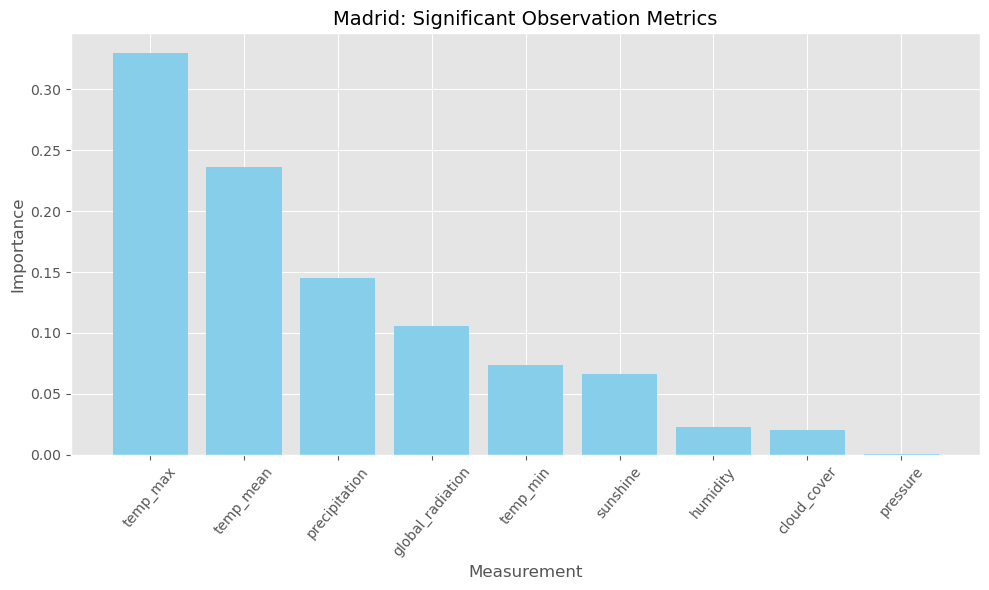

In [609]:
# Plot the importances

plt.style.use('ggplot')
plt_3 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_3['Measurement'], importances_df_3['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Madrid: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()

The most important indicators for **Madrid** are: 
- 'temp_max'
- 'temp_mean'
- 'precipitation'

### **Budapest**

**Preprocessing the Data for Budapest**

In [613]:
# Filter weather dataset to only include Budapest
df_bud = df_1[df_1.columns[df_1.columns.astype(str).str.startswith('BUDAPEST')]]

# Check output
df_bud.head(1)

BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0                     4               0.67              1.017   

   BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                       0.44                    0.01                2.3   

   BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  
0                 2.4               -0.4                5.1

In [614]:
# Filter pleasant dataset to only include Budapest
bud_pleasant = df_pleasant[df_pleasant.columns[df_pleasant.columns.astype(str).str.startswith('BUDAPEST')]]

# Check output
bud_pleasant.head(1)

BUDAPEST_pleasant_weather
0                          0

In [615]:
# Check shape
print(df_bud.shape)
print(bud_pleasant.shape)

(22950, 9)
(22950, 1)


In [616]:
# Create matrices
y_4 = bud_pleasant.max(axis=1)

# Check shape
print("Shape of y_4_combined:", y_4.shape)

Shape of y_4_combined: (22950,)


In [617]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_4_combined:", y_4.unique())

Unique values in y_4_combined: [0 1]


In [618]:
# Ensure y has the correct shape
y_4 = y_4.to_numpy().reshape(-1)

# Check shape
print(y_4.shape)

(22950,)


In [619]:
# Create X matrix
X_4 = df_bud.to_numpy()

# Check shapes of the matrices
print(X_4.shape)
print(y_4.shape)

(22950, 9)
(22950,)


In [620]:
# Split data into training and testing sets
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, random_state=127)

# Check shapes
print(X_train_4.shape, y_train_4.shape)
print(X_test_4.shape, y_test_4.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


**Creating a Random Forest for Budapest**

In [622]:
# Creating a Random Forest classifier
clf_4 = RandomForestClassifier(n_estimators = 100, max_depth=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_4.fit(X_train_4, y_train_4)

RandomForestClassifier(max_depth=3)

In [623]:
# Perform the predictions on the test dataset
y_pred_4 = clf_4.predict(X_test_4)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_4, y_pred_4))

Model Accuracy:  0.9989543394911119


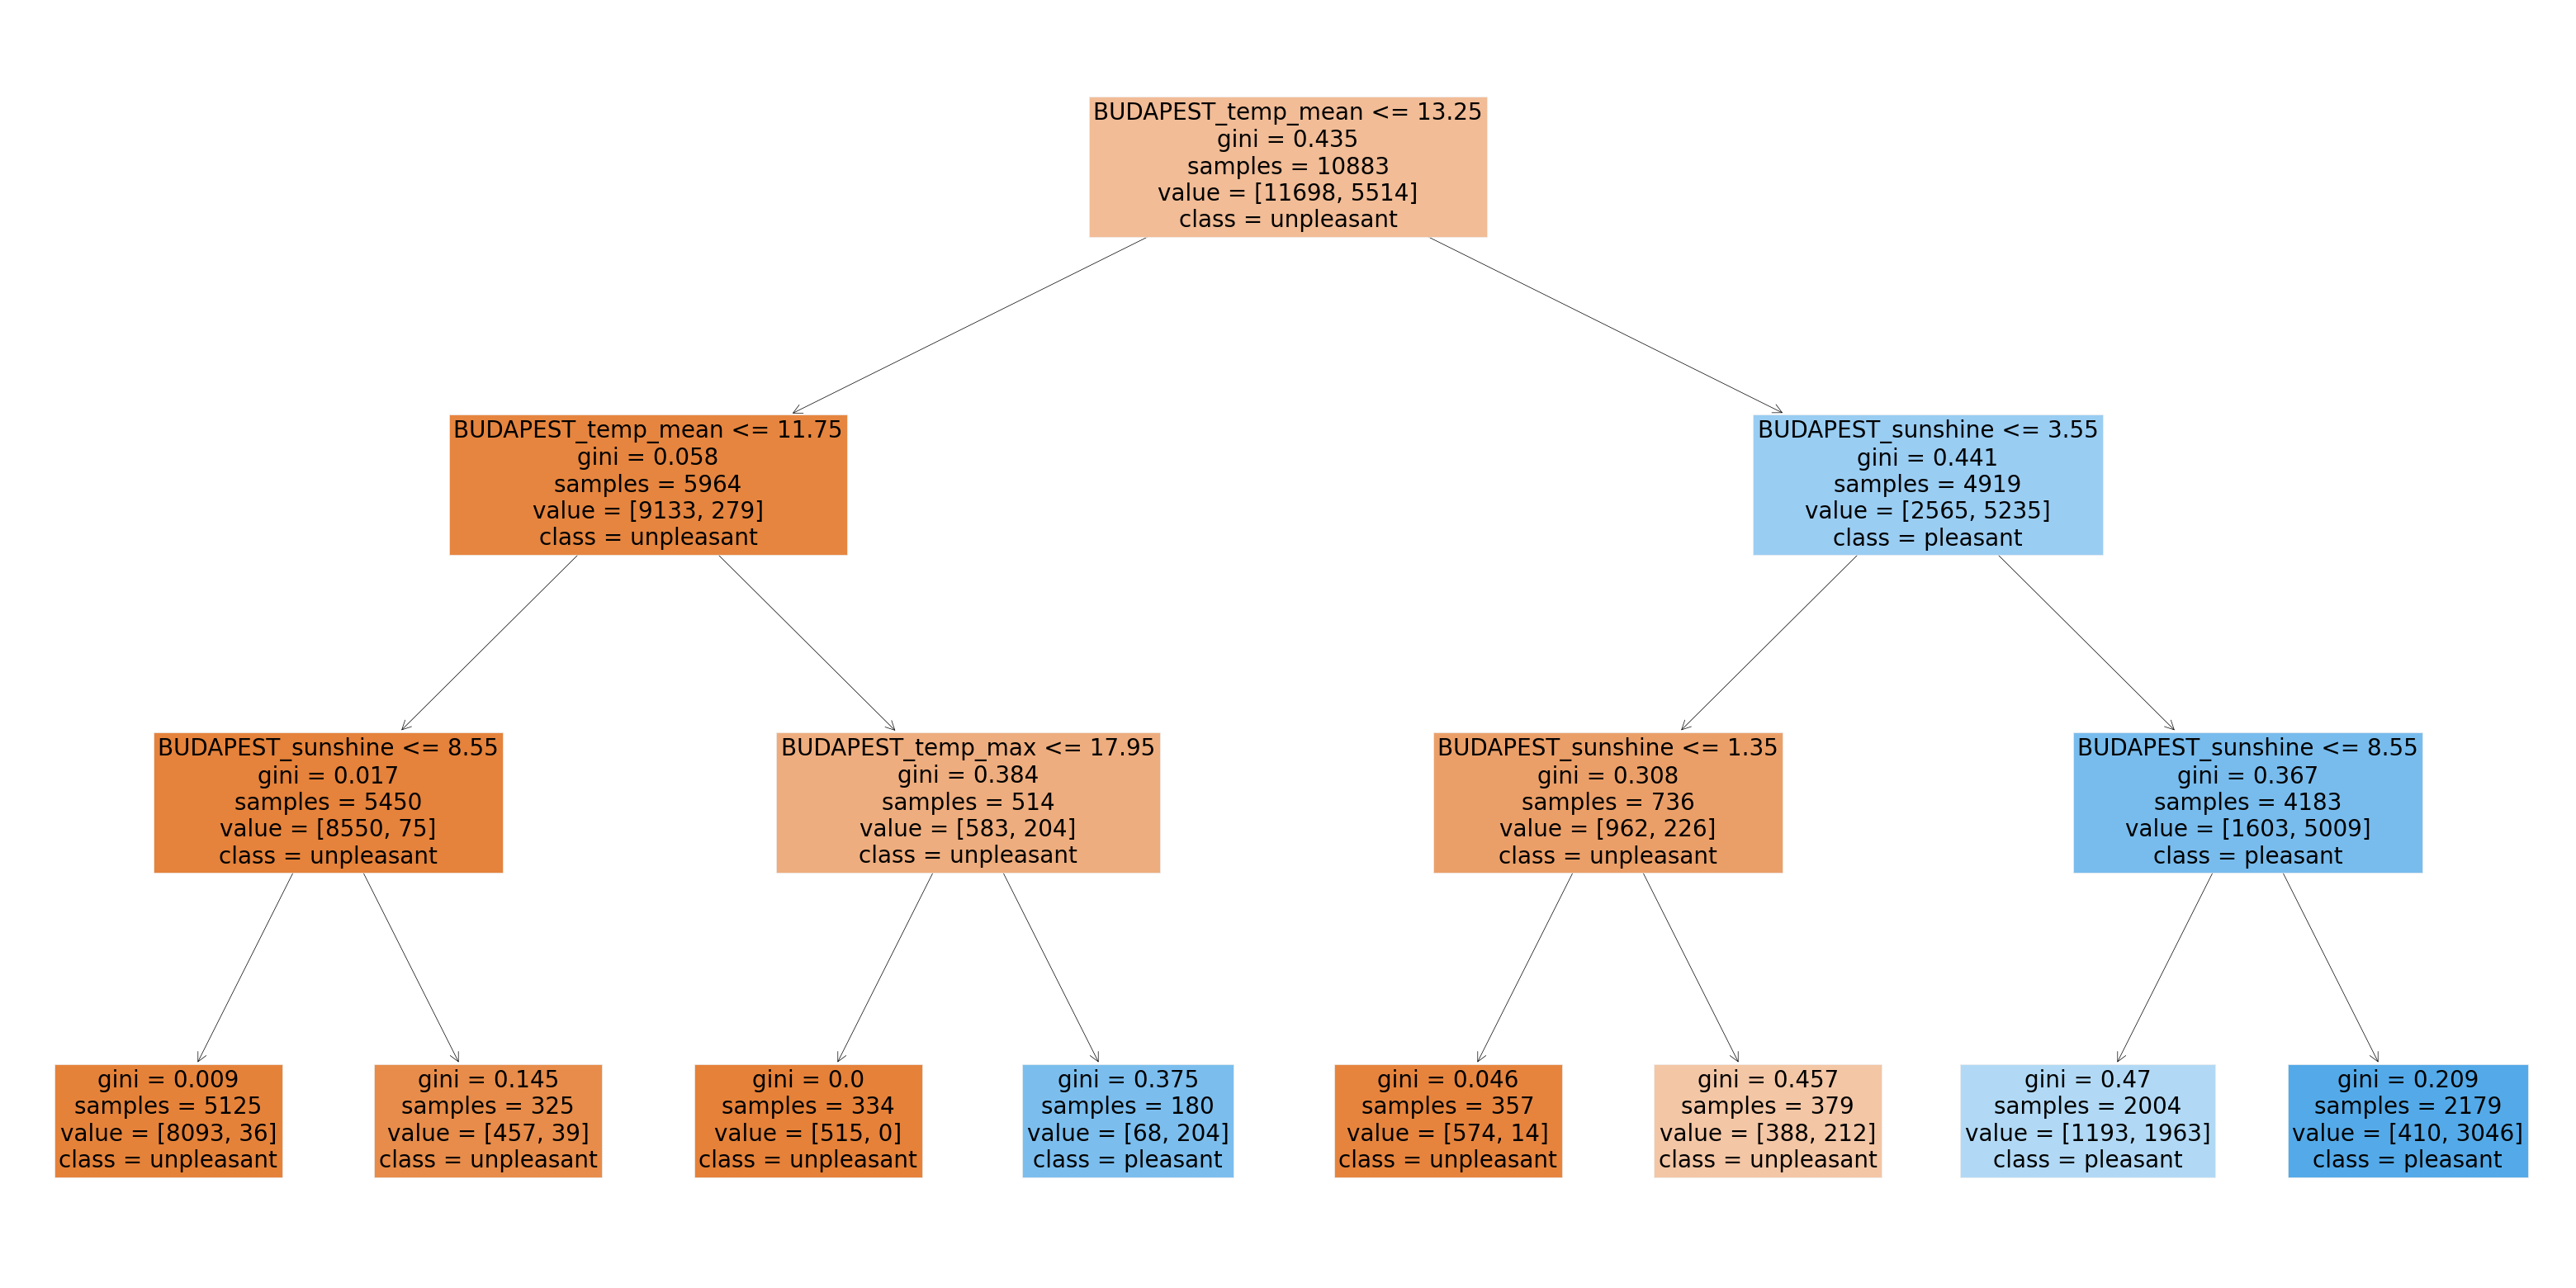

In [624]:
# Plot random forest (Budapest)
rf_4 = plt.figure(figsize=(40,20))
plot_tree(clf_4.estimators_[5], fontsize = 20, feature_names=df_bud.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [637]:
rf_4.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'random_forest_budapest.png'),bbox_inches='tight')

**Listing Feature Importances**

In [640]:
# Retrieve feature importances from the trained model
feature_importances_4 = clf_4.feature_importances_
print("Feature Importances:", feature_importances_4)
print(feature_importances_4.shape)

Feature Importances: [0.00966218 0.00619411 0.00192207 0.08849276 0.19138222 0.05698396
 0.20242864 0.11820804 0.32472601]
(9,)


In [641]:
# Create a dataframe to associate observation measurements with their importances
importances_df_4 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_4
})

In [642]:
# Sort by importance for chart readability
importances_df_4 = importances_df_4.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_4)

Feature Importance:
        Measurement  Importance
8          temp_max    0.324726
6         temp_mean    0.202429
4     precipitation    0.191382
7          temp_min    0.118208
3  global_radiation    0.088493
5          sunshine    0.056984
0       cloud_cover    0.009662
1          humidity    0.006194
2          pressure    0.001922


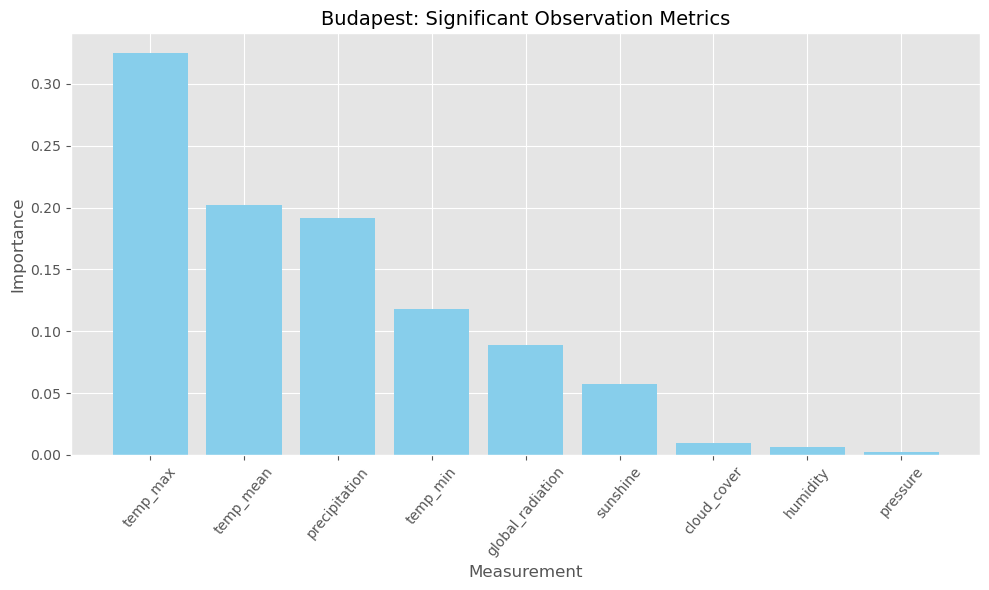

In [643]:
# Plot the importances

plt.style.use('ggplot')
plt_4 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_4['Measurement'], importances_df_4['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Budapest: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()

> The most important indicators for **Budapest** are: **'temp_max', 'precipitation', and 'temp_mean'.**

### **Ljubljana**

**Processing the data for Ljubljana**

In [647]:
# Filter weather dataset to only include Budapest
df_ljub = df_1[df_1.columns[df_1.columns.astype(str).str.startswith('LJUBLJANA')]]

# Check output
df_ljub.head(1)

LJUBLJANA_cloud_cover  LJUBLJANA_humidity  LJUBLJANA_pressure  \
0                      8                 1.0              1.0173   

   LJUBLJANA_global_radiation  LJUBLJANA_precipitation  LJUBLJANA_sunshine  \
0                         0.2                      0.0                 0.0   

   LJUBLJANA_temp_mean  LJUBLJANA_temp_min  LJUBLJANA_temp_max  
0                 -0.6                -1.9                 0.5

In [648]:
# Filter pleasant dataset to only include Ljubljana
ljub_pleasant = df_pleasant[df_pleasant.columns[df_pleasant.columns.astype(str).str.startswith('LJUBLJANA')]]

# Check output
ljub_pleasant.head(1)

LJUBLJANA_pleasant_weather
0                           0

In [649]:
# Check shape
print(df_ljub.shape)
print(ljub_pleasant.shape)

(22950, 9)
(22950, 1)


In [650]:
# Create matrices
y_5 = ljub_pleasant.max(axis=1)

# Check shape
print("Shape of y_5_combined:", y_5.shape)

Shape of y_5_combined: (22950,)


In [651]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_5_combined:", y_5.unique())

Unique values in y_5_combined: [0 1]


In [652]:
# Ensure y has the correct shape
y_5 = y_5.to_numpy().reshape(-1)

# Check shape
print(y_5.shape)

(22950,)


In [653]:
# Create X matrix
X_5 = df_ljub.to_numpy()

# Check shapes of the matrices
print(X_5.shape)
print(y_5.shape)

(22950, 9)
(22950,)


In [654]:
# Split data into training and testing sets
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, random_state=127)

# Check shapes
print(X_train_5.shape, y_train_5.shape)
print(X_test_5.shape, y_test_5.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


**Creating a Random Forest for Ljubljana**

In [656]:
# Creating a Random Forest classifier
clf_5 = RandomForestClassifier(n_estimators = 100, max_depth=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_5.fit(X_train_5, y_train_5)

RandomForestClassifier(max_depth=3)

In [657]:
# Perform the predictions on the test dataset
y_pred_5 = clf_5.predict(X_test_5)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_5, y_pred_5))

Model Accuracy:  0.9979086789822238


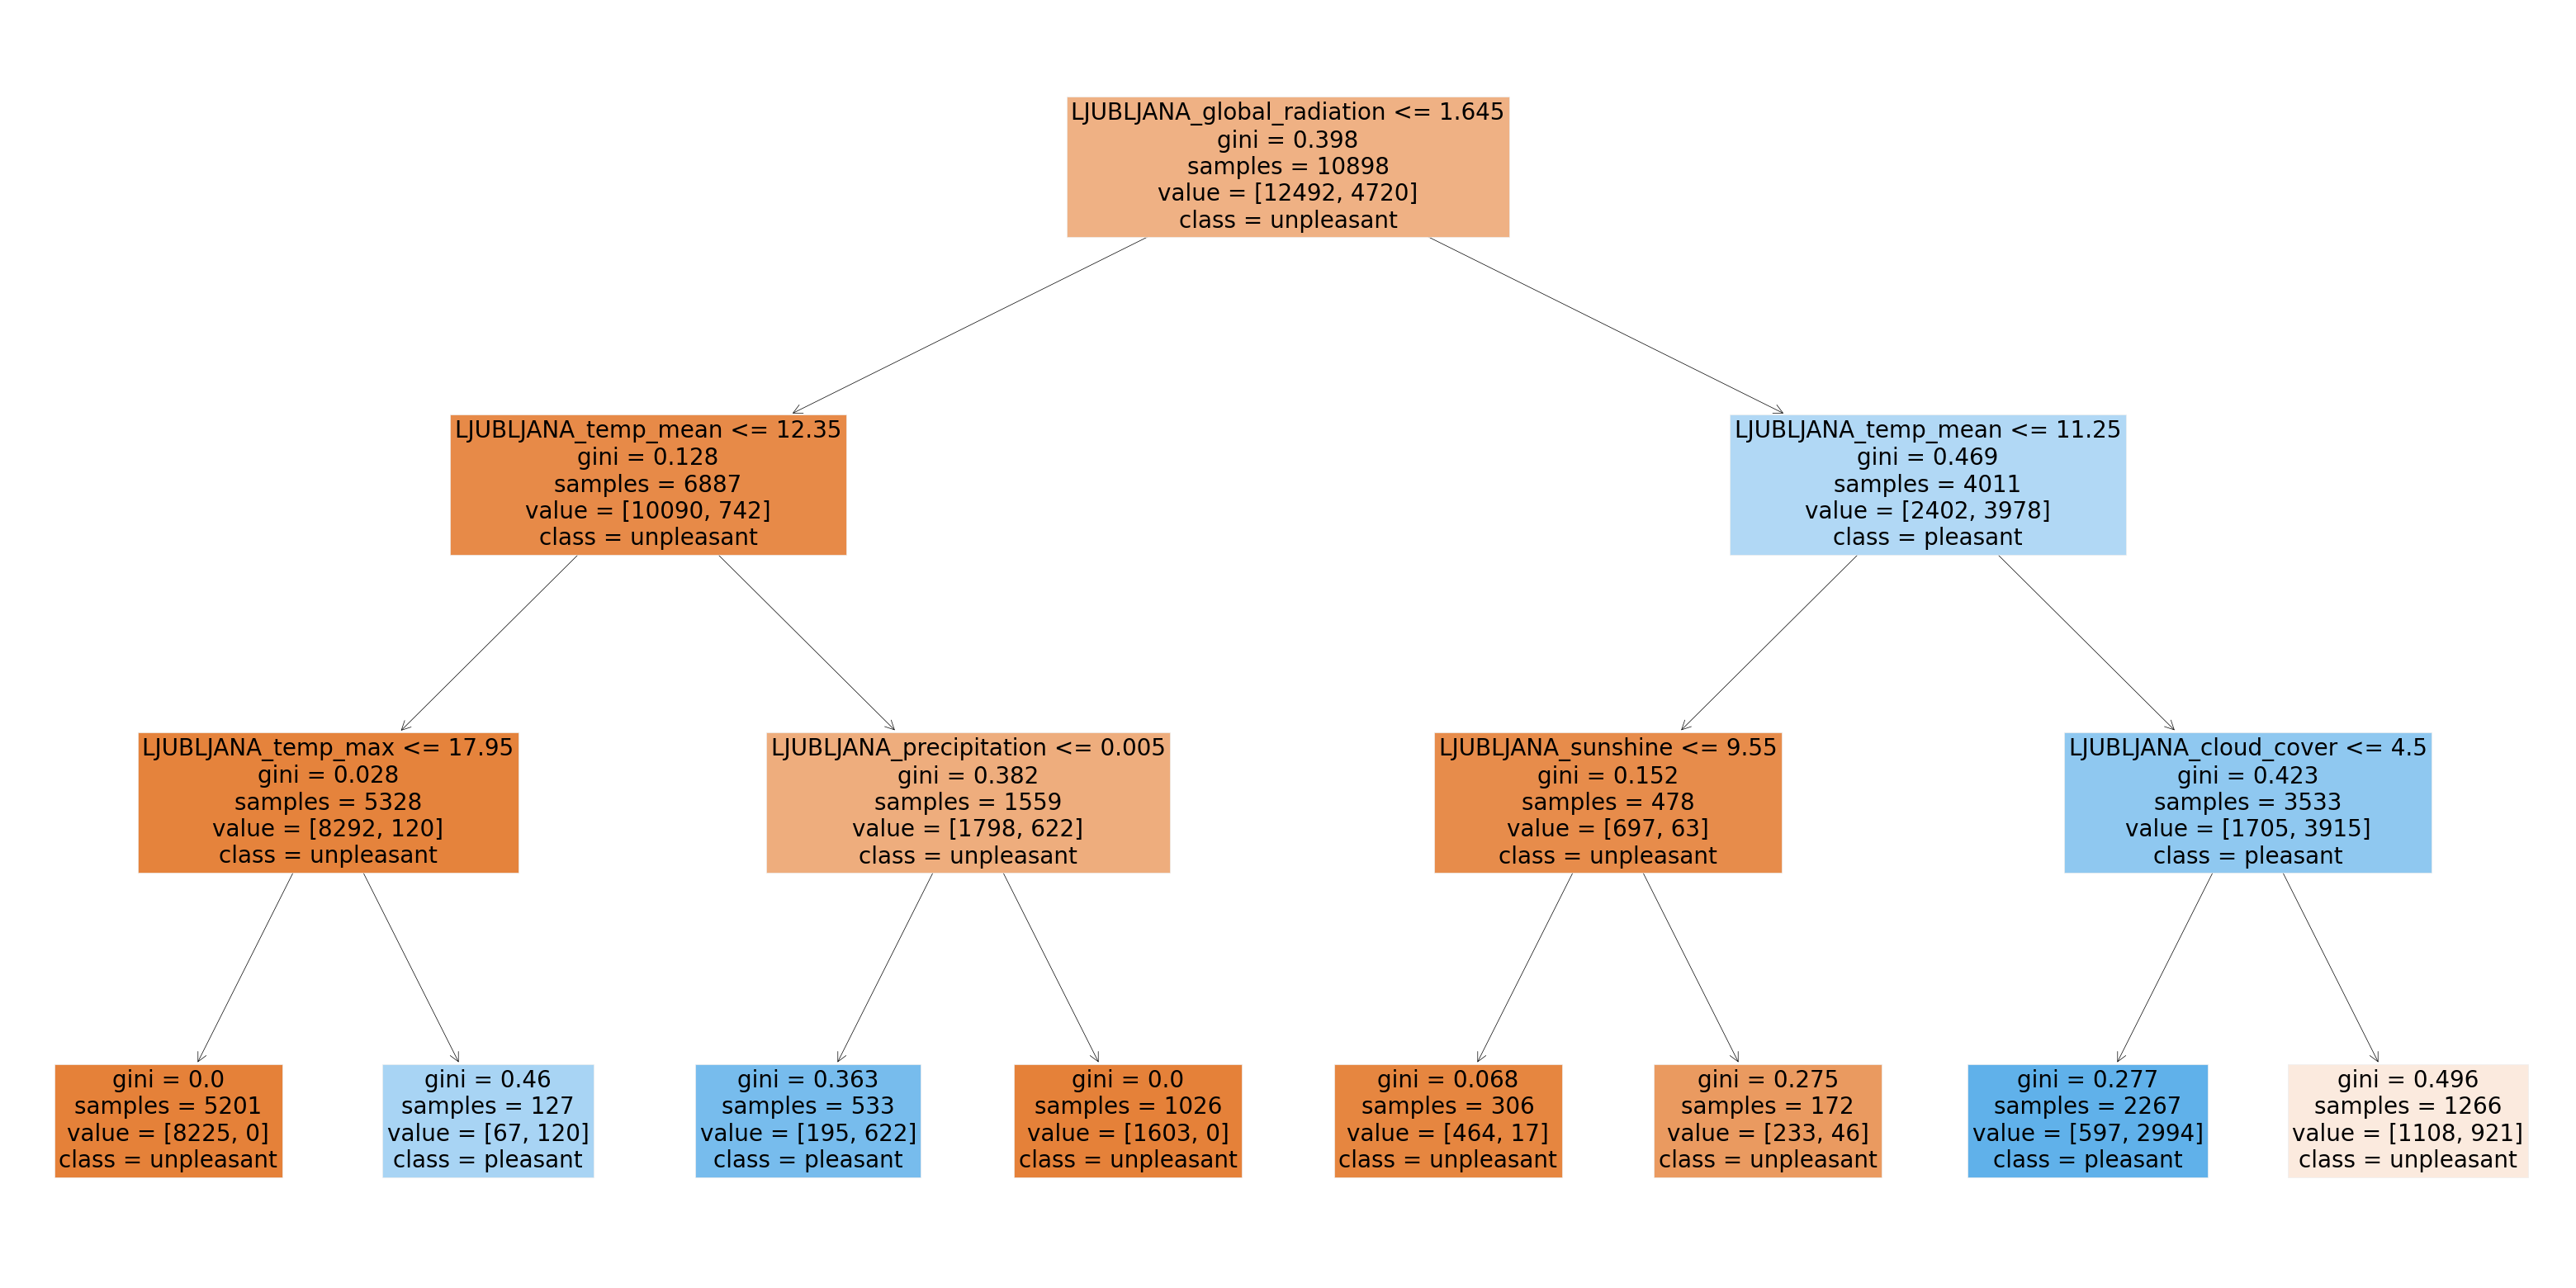

In [658]:
# Plot random forest (Ljubljana)
rf_5 = plt.figure(figsize=(40,20))
plot_tree(clf_5.estimators_[5], fontsize = 20, feature_names=df_ljub.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [665]:
# Export plot
rf_5.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'random_forest_ljubljana.png'),bbox_inches='tight')

**Listing Feature Importances**

In [668]:
# Retrieve feature importances from the trained model
feature_importances_5 = clf_5.feature_importances_
print("Feature Importances:", feature_importances_5)
print(feature_importances_5.shape)

Feature Importances: [0.05453933 0.01447704 0.00142329 0.16951228 0.27529936 0.07041166
 0.14133064 0.01650586 0.25650053]
(9,)


In [669]:
# Create a dataframe to associate observation measurements with their importances
importances_df_5 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_5
})

In [670]:
# Sort by importance for chart readability
importances_df_5= importances_df_5.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_5)

Feature Importance:
        Measurement  Importance
4     precipitation    0.275299
8          temp_max    0.256501
3  global_radiation    0.169512
6         temp_mean    0.141331
5          sunshine    0.070412
0       cloud_cover    0.054539
7          temp_min    0.016506
1          humidity    0.014477
2          pressure    0.001423


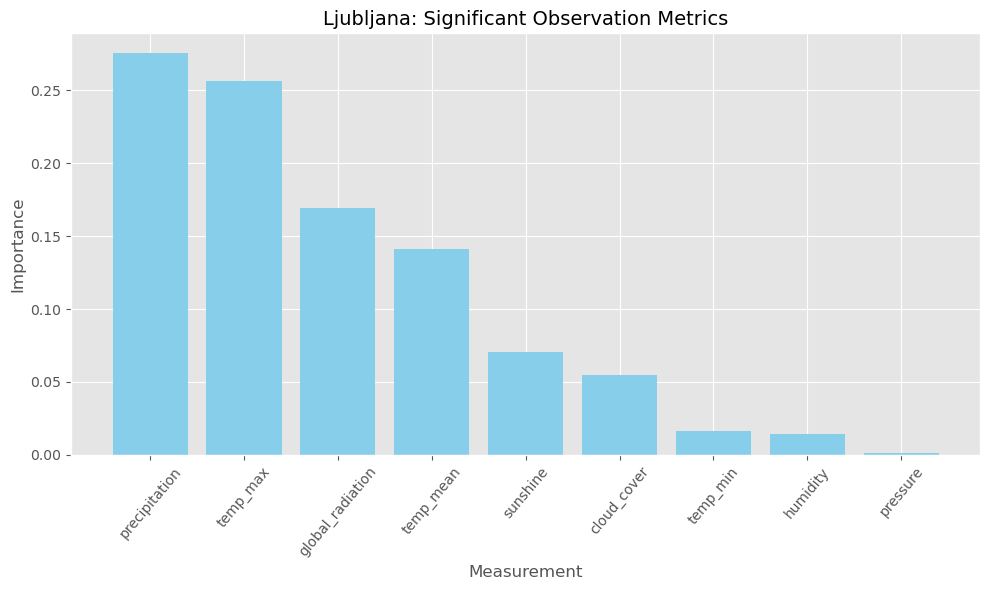

In [671]:
# Plot the importances

plt.style.use('ggplot')
plt_5 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_5['Measurement'], importances_df_5['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Ljubljana: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()

The most important indicators for **Ljubljana** are: 
- 'temp_max'
- 'precipitation'
- 'global_radiation'